In [9]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

df=pd.read_csv(r'C:\Users\Samuel\Desktop\ALX\Dataset\energydata_complete.csv')

In [10]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


**Q12. From the dataset, fit a linear model on the relationship between the temperature in the living room in Celsius (x = T2) and the temperature outside the building (y = T6). What is the R^2 value in two d.p.?**

In [11]:
df.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

<AxesSubplot:xlabel='T2', ylabel='T6'>

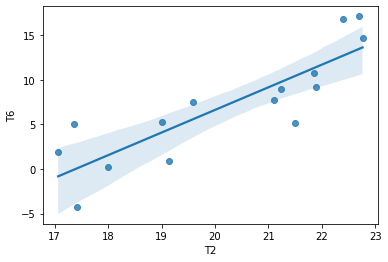

In [12]:
simple_linear_reg_df = df[['T2', 'T6']].sample(15, random_state=2)
sns.regplot(x="T2", y="T6",data=simple_linear_reg_df)

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df.drop(columns=['date', 'lights'],inplace=True,axis=1)

In [14]:
normalised_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)


In [15]:
#This is so as fix bugs
X1=normalised_df['T2'].values.reshape(-1, 1)
Y=normalised_df['T6'].values.reshape(-1, 1)
#Now, we split our dataset into the training and testing dataset.
X_train, X_test, Y_train, Y_test = train_test_split(X1, Y,test_size=0.3, random_state=42)

In [16]:
from sklearn import linear_model
model=linear_model.LinearRegression()


In [17]:
model=linear_model.LinearRegression()
model.fit(X_train,Y_train)
predicted_val = model.predict(X_test)
r2_score = r2_score(Y_test, predicted_val)
print("Therefore the R^2 value is {}".format(round(r2_score,2)))

Therefore the R^2 value is 0.64


**Q13. Normalize the dataset using the MinMaxScaler after removing the following columns: [“date”, “lights”]. The target variable is “Appliances”. Use a 70-30 train-test set split with a random state of 42 (for reproducibility). Run a multiple linear regression using the training set and evaluate your model on the test set. Answer the following questions:**

**What is the Mean Absolute Error (in two decimal places)?**

In [18]:
#We normalise our dataset to a common scale using the min max scaler

normalised_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
X=normalised_df.drop('Appliances',axis=1)
Y = normalised_df['Appliances']

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y,test_size=0.3, random_state=42)

In [20]:
models=LinearRegression()

In [21]:
models.fit(x_train,y_train)

LinearRegression()

In [22]:
predicted_values = models.predict(x_test)
mae=mean_absolute_error(y_test,predicted_values)
print("The mean absolute Error is {}".format(round(mae,3)))

The mean absolute Error is 0.05


**Q14. What is the Residual Sum of Squares (in two decimal places)?**

In [23]:
rss=np.sum(np.square(y_test - predicted_values))
print("The Residual Sum of Square error is {}".format(round(rss, 3)))

The Residual Sum of Square error is 45.348


**Q15. What is the Root Mean Squared Error (in three decimal places)?**

In [24]:
from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(y_test,predicted_values))
print("The Root Mean Squared Error is {}".format(round(rmse, 3)))

The Root Mean Squared Error is 0.088


**Q16 What is the Coefficient of Determination (in two decimal places)?**

In [25]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,predicted_values)
print("The Coefficient of Determination is {}".format(round(r2,2)))

The Coefficient of Determination is 0.15


**Q17. Obtain the feature weights from your linear model above. Which features have the lowest and highest weights respectively?**

In [26]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.4)
ridge_reg.fit(x_train, y_train)
ridge_predicted=ridge_reg.predict(x_train)
rrmse=np.sqrt(mean_squared_error(y_train,ridge_predicted))
print("The new Root mean squared Error is {}".format(round(rrmse,3)))


The new Root mean squared Error is 0.089


**Therefore there is a difference in the values of the root mean squared value**

**Q18. Train a ridge regression model with an alpha value of 0.4. Is there any change to the root mean squared error (RMSE) when evaluated on the test set?**

In [27]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)


Lasso(alpha=0.001)

In [28]:
#comparing the effects of regularisation
def get_weights_df(model, feat, col_name):
#this function returns the weight of every feature
    weights = pd.Series(model.coef_, feat.columns).sort_values()
    weights_df = pd.DataFrame(weights).reset_index()
    weights_df.columns = ['Features', col_name]
    weights_df[col_name].round(3)
    return weights_df


In [29]:
linear_model_weights = get_weights_df(models, x_train, 'Linear_Model_Weight')
linear_model_weights

,Features,Linear_Model_Weight
0,RH_2,-0.456698
1,T_out,-0.321860
2,T2,-0.236178
3,T9,-0.189941
4,RH_8,-0.157595
5,RH_out,-0.077671
6,RH_7,-0.044614
7,RH_9,-0.039800
8,T5,-0.015657
9,T1,-0.003281


**Therefore, RH_2 ahs the lowest weight of RH_2=-0.456698 and  RH_1 has the highest height of RH_1 =0.553547**

**Q19. Train a lasso regression model with an alpha value of 0.001 and obtain the new feature weights with it. How many of the features have non-zero feature weights?**

In [30]:
ridge_weights_df = get_weights_df(ridge_reg, x_train, 'Ridge_Weight')
lasso_weights_df = get_weights_df(lasso_reg, x_train, 'Lasso_weight')

In [31]:
final_weights = pd.merge(linear_model_weights, ridge_weights_df, on='Features')
final_weights = pd.merge(final_weights, lasso_weights_df, on='Features')

In [32]:
count_final=final_weights[final_weights.Lasso_weight!=0]
count_final

,Features,Linear_Model_Weight,Ridge_Weight,Lasso_weight
4,RH_8,-0.157595,-0.156830,-0.000110
5,RH_out,-0.077671,-0.054724,-0.049557
18,Windspeed,0.029183,0.030268,0.002912
25,RH_1,0.553547,0.519525,0.017880


**There are 4 values which have the lassso weight no zero and they are RH_8,RH_out,Windspeed,RH_1**

**Q20. What is the new RMSE with the lasso regression? (Answer should be in three (3) decimal places)**

In [33]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.4)
ridge_reg.fit(x_train, y_train)
ridge_predicted=ridge_reg.predict(x_train)
rrmse=np.sqrt(mean_squared_error(y_train,ridge_predicted))
print("The new Root mean squared Error is {}".format(round(rrmse,3)))

The new Root mean squared Error is 0.089


**Hence the value of the Root Mean Squared error is 0.089**